In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer

from googletrans import Translator
from deep_translator import GoogleTranslator
import string
import emoji
from bs4 import BeautifulSoup

from dotenv import load_dotenv
import os

import itertools
from html import unescape
import re

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/100000_tweets_BlackLivesMatter_1.csv')
list(df.tweet_rendered_content.iloc[:10])

['SJSHSJJSH siapa yg nangis... gw.... ya Allah kak namjoon knp kok blm bobo skrng kak pls bobo udh malem KAK UDH MALEM JGN BIKIN GW NANGIS KAK 😿😿😿😿😿😿😿😿😿😿😿😿😿',
 '@Diiovane_ Sim',
 'Someone needs to check the keepers Betway account',
 '@jisellearn Baru mau mng cel blm sempet kenalan kite gpp dah semangat lu cil moga2 jdi Profesor',
 '@REMASxKARINA betul sih wkwkw km blm bobo kah?',
 '@ProudElephantUS Consequences. Imagine that. EXCEPT at BLM/ANTIFA riots, sorry, protests.',
 'eh demi allah untung blm puasa https://t.co/tl1xKlkEx4',
 'During the BLM riots in the summer of 2020 and beyond, Eric Adams, de Blasio &amp; City Council members didn’t say or do anything to try to control the calamity that was occurring on a daily basis.\n\nIn fact, I remember D’s saying that riots are the voice of the unheard.',
 'Why didn’t he say this to BLM and the other activists ?',
 '@moonareas blm jg imsakk']

In [3]:
df.head()

,Unnamed: 0,date,tweet_content,tweet_rendered_content,tweet_id,user_name,display_name,user_id,user_description,user_follower_count,...,tweet_reply_count,tweet_retweet_count,tweet_like_count,tweet_quote_count,tweet_language,tweet_source,rt_original_tweet_id,quoted_tweet_original_tweet_id,tweet_mentioned_users,tweet_hashtags
0,0,2022-04-22 17:26:15.207532763,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,SJSHSJJSH siapa yg nangis... gw.... ya Allah k...,1.643000e+18,nadealeine,Noémie,1.278350e+18,NaN,16,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/charts_k/status/1642948123...,NaN,NaN
1,1,2021-04-21 19:03:56.518516406,@Diiovane_ Sim,@Diiovane_ Sim,1.643000e+18,FonsecaSCI2478,Fonsecaˢᶜᶦ🇮🇩 BlackLivesMatter ✊🏿,1.028440e+18,"Casado, Pai do Igor, Juan, Antony, Laura e B...",1409,...,0,0,0,0,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='Diiovane_', id=3072255134, dis...",NaN
2,2,2021-03-23 10:27:38.540305625,Someone needs to check the keepers Betway account,Someone needs to check the keepers Betway account,1.643000e+18,ArsenalBLM,BLMAlways,1.293480e+18,#BlackLivesMatter,181,...,0,0,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,https://twitter.com/CraigGTelfer/status/164290...,NaN,NaN
3,3,2021-01-02 10:14:06.885676513,@jisellearn Baru mau mng cel blm sempet kenala...,@jisellearn Baru mau mng cel blm sempet kenala...,1.643000e+18,plngee,GheYaa,1.386010e+18,Duta Badlooking Sejagad!,46,...,0,0,0,0,in,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='jisellearn', id=16426332242403...",NaN
4,4,2022-12-21 10:46:27.602754696,@REMASxKARINA betul sih wkwkw km blm bobo kah?,@REMASxKARINA betul sih wkwkw km blm bobo kah?,1.643000e+18,REMASxHKE,Akiffa,7.736230e+17,you’ll find me on my tallest tiptoes spinning ...,139,...,0,0,0,0,in,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='REMASxKARINA', id=163376329292...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      100000 non-null  int64  
 1   date                            100000 non-null  object 
 2   tweet_content                   100000 non-null  object 
 3   tweet_rendered_content          100000 non-null  object 
 4   tweet_id                        100000 non-null  float64
 5   user_name                       100000 non-null  object 
 6   display_name                    99991 non-null   object 
 7   user_id                         100000 non-null  float64
 8   user_description                87937 non-null   object 
 9   user_follower_count             100000 non-null  int64  
 10  user_friend_count               100000 non-null  int64  
 11  user_statuses_count             100000 non-null  int64  
 12  user_location    

In [5]:
# drop irrelevant jobs
df.drop(['Unnamed: 0','tweet_content','rt_original_tweet_id','quoted_tweet_original_tweet_id','tweet_hashtags'],axis=1,inplace=True)

In [6]:
len(df)

100000

In [7]:
df.shape

(100000, 18)

In [8]:
np.sum(df.isnull().any(axis=1))

62173

In [9]:
# convert column to date
df['date'] = pd.to_datetime(df['date'])

# get year and moth
df['year'] = df['date'].apply(lambda x:x.year)
df['month'] = df['date'].apply(lambda x:x.month)

In [10]:
df['year'].value_counts()

2022    48374
2021    48010
2023     3616
Name: year, dtype: int64

In [11]:
df['month'].value_counts()

1     11930
5      8298
7      8273
8      8174
10     8110
3      8102
12     8101
4      7964
6      7936
9      7883
11     7760
2      7469
Name: month, dtype: int64

In [25]:
def remove_emoji(text):
    # convert emoji to its base text (enclosed in :emoji:)
    text = emoji.demojize(text)
    
    # remove converted emoji 
    pattern = r":[^:\s]+:"
    text = re.sub(pattern, "", text)
    text = text.replace("  "," ")
    return text

df['tweet_rendered_content'] = df['tweet_rendered_content']\
                                    .apply(lambda x:remove_emoji(x))

In [26]:
def remove_urls(text):
    pattern = r"http\S+|www\S+"
    text = re.sub(pattern, "", text)
    return text

df['tweet_rendered_content'] = df['tweet_rendered_content']\
                                .apply(lambda x:remove_urls(x))

In [27]:
print("There are",len(df['tweet_language']\
                      .value_counts()),"different languages")

There are 46 different languages


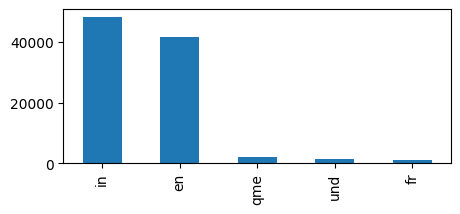

In [28]:
# top 5 languages
plt.figure(figsize=(5,2))
df['tweet_language'].value_counts().head(5).plot(kind='bar')
plt.show()

In [81]:
# in - indonesia, en - english, 
# und - undefined, fr - french , 
# qme - for tweets with media links only

Tested out microsoft translator and the output was not as expected

In [20]:
load_dotenv('.env')
subscription_key = os.getenv('SUBSCRIPTION_KEY')

In [21]:
project_location = 'uksouth'

In [1]:
import requests
import uuid
import json

# API endpoint and subscription key
endpoint = "https://api.cognitive.microsofttranslator.com/translate"

# text to be translated
text = "jisellearn baru mau mng cel blm sempet kenalan"

# source and target languages
from_lang = "id-ID"
to_lang = "en"

# request headers
headers = {
    "Ocp-Apim-Subscription-Key": subscription_key,
    "Ocp-Apim-Subscription-Region": project_location,
    "Content-Type": "application/json",
    "X-ClientTraceId": str(uuid.uuid4())
}

# request body
body = [{
    "text": text
}]

# query parameters
params = {
    "api-version": "3.0",
    "from": from_lang,
    "to": to_lang
}

# POST request 
response = requests.post(endpoint, headers=headers, params=params, json=body)

# translated text from response
translation = response.json()

# final o/p
print(translation)

In [29]:
df_test = df[df['tweet_language'] == 'in'][:10].copy()

**Moved on to Googles Translator :** https://pypi.org/project/googletrans/

In [31]:
to_translate = df_test.iloc[1]['tweet_rendered_content']

translated = GoogleTranslator(source='id', target='en').translate(to_translate)
translated

"@jisellearn Just want to ask Cel, haven't gotten to know us yet, it's okay, I'm excited, I hope you become a professor"

In [32]:
# convert 'in' to 'id' for ease of execution
df['tweet_language'] = df['tweet_language'].replace('in', 'id')

In [33]:
def translate_to_target(x, source, target):
    translated = GoogleTranslator(source=source, target=target).translate(x)
    return translated

count = 0

def process_row(row, source_language, target_language, print_progress=False):
    global count
    count += 1
    if print_progress and count % 1000 == 0:
        print(f"Processed {count} rows")

    if row['tweet_language'] == source_language:
        return translate_to_target(row['tweet_rendered_content'], source_language, target_language)
    else:
        return row['tweet_rendered_content']

In [34]:
# process rows
for index, row in df.iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'id','en', print_progress=True)

Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows
Processed 13000 rows
Processed 14000 rows
Processed 15000 rows
Processed 16000 rows
Processed 17000 rows
Processed 18000 rows
Processed 19000 rows
Processed 20000 rows
Processed 21000 rows
Processed 22000 rows
Processed 23000 rows
Processed 24000 rows
Processed 25000 rows
Processed 26000 rows
Processed 27000 rows
Processed 28000 rows
Processed 29000 rows
Processed 30000 rows
Processed 31000 rows
Processed 32000 rows
Processed 33000 rows
Processed 34000 rows
Processed 35000 rows
Processed 36000 rows
Processed 37000 rows
Processed 38000 rows
Processed 39000 rows
Processed 40000 rows
Processed 41000 rows
Processed 42000 rows
Processed 43000 rows
Processed 44000 rows
Processed 45000 rows
Processed 46000 rows
Processed 47000 rows
Processed 48000 rows
P

In [151]:
# code broke due to a Translation error
# start_index = 52000

# for index, row in df.iloc[start_index:].iterrows():
#     try:
#         df.at[index, 'tweet_rendered_content'] = process_row(row, 'id', 'en', print_progress=True)
#     except Exception as e:
#         print(f"Translation not found for index {index}. Removing row.")
#         df.drop(index, inplace=True)

Processed 53000 rows
Processed 54000 rows
Processed 55000 rows
Processed 56000 rows
Processed 57000 rows
Processed 58000 rows
Processed 59000 rows
Processed 60000 rows
Processed 61000 rows
Processed 62000 rows
Processed 63000 rows
Processed 64000 rows
Processed 65000 rows
Processed 66000 rows
Processed 67000 rows
Processed 68000 rows
Processed 69000 rows
Processed 70000 rows
Processed 71000 rows
Processed 72000 rows
Processed 73000 rows
Processed 74000 rows
Processed 75000 rows
Processed 76000 rows
Processed 77000 rows
Processed 78000 rows
Processed 79000 rows
Processed 80000 rows
Processed 81000 rows
Processed 82000 rows
Processed 83000 rows
Processed 84000 rows
Processed 85000 rows
Processed 86000 rows
Processed 87000 rows
Processed 88000 rows
Processed 89000 rows
Processed 90000 rows
Processed 91000 rows
Processed 92000 rows
Processed 93000 rows
Processed 94000 rows
Processed 95000 rows
Processed 96000 rows
Processed 97000 rows
Processed 98000 rows
Processed 99000 rows
Processed 100

In [36]:
# reset count for future use    
count = 0 

**TESTING FRENCH CONVERSION :**

In [37]:
df[df['tweet_language'] == 'fr'].iloc[2]['tweet_rendered_content']

'@pessiLapierre @le_blm @ArnaultRaphael @IvarMundus Mdrrrrr il veut nous faire le mystérieux ce brank c’est quoi le délire Twitter ça vous fais trop pousser des boule'

In [38]:
to_translate = df[df['tweet_language'] == 'fr'].iloc[2]['tweet_rendered_content']

translated = GoogleTranslator(source='fr', target='en').translate(to_translate)
translated

'@pessiLapierre @le_blm @ArnaultRaphael @IvarMundus Mdrrrrr he wants to make us mysterious this brank what is the delirium Twitter it makes you grow too many balls'

In [41]:
# process rows
for index, row in df.iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'fr','en',print_progress=True)

Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows
Processed 13000 rows
Processed 14000 rows
Processed 15000 rows
Processed 16000 rows
Processed 17000 rows
Processed 18000 rows
Processed 19000 rows
Processed 20000 rows
Processed 21000 rows
Processed 22000 rows
Processed 23000 rows
Processed 24000 rows
Processed 25000 rows
Processed 26000 rows
Processed 27000 rows
Processed 28000 rows
Processed 29000 rows
Processed 30000 rows
Processed 31000 rows
Processed 32000 rows
Processed 33000 rows
Processed 34000 rows
Processed 35000 rows
Processed 36000 rows
Processed 37000 rows
Processed 38000 rows
Processed 39000 rows
Processed 40000 rows
Processed 41000 rows
Processed 42000 rows
Processed 43000 rows
Processed 44000 rows
Processed 45000 rows
Processed 46000 rows
Processed 47000 rows
Processed 48000 rows
P

In [42]:
df[df['tweet_language']=='fr'].iloc[0]['tweet_rendered_content']

'@le_blm @pessiLapierre @ArnaultRaphael @IvarMundus @PoliceNationale Mdrrrrr you can see the only times he left his house was to buy a computer and to file a complaint against this clown'

**Japaneses :** 

In [43]:
to_translate = df[df['tweet_language'] == 'ja'].iloc[2]['tweet_rendered_content']
to_translate

'雅結はやっぱ素敵…'

In [44]:
translated = GoogleTranslator(source='ja', target='en').translate(to_translate)
translated

'Yayui is really nice...'

In [45]:
for index, row in df[df['tweet_language']=='ja'].iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'ja','en')

**Espanyol :**

In [46]:
to_translate = df[df['tweet_language'] == 'es'].iloc[2]['tweet_rendered_content']
to_translate

'@PlushError no es por eso es para tapar un lío en el que se ha metido'

In [47]:
translated = GoogleTranslator(source='es', target='en').translate(to_translate)
translated

"@PlushError that's not why it's to cover up a mess he's gotten himself into"

In [48]:
for index, row in df[df['tweet_language']=='es'].iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'es','en')

**denmark:**

In [49]:
to_translate = df[df['tweet_language'] == 'de'].iloc[3]['tweet_rendered_content']
to_translate

'@levlupde 300 Euro dann grundlos gebannt worden von activison und alles weg nochmal Dankeschön call of duty dickes Kuss'

In [50]:
translated = GoogleTranslator(source='de', target='en').translate(to_translate)
translated

'@levlupde 300 euros then been banned by activison for no reason and everything gone again thank you call of duty big kiss'

In [51]:
for index, row in df[df['tweet_language']=='de'].iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'de','en')

**korean:**

In [52]:
to_translate = df[df['tweet_language'] == 'ko'].iloc[3]['tweet_rendered_content']
to_translate

'4디페 일단 아마 혼자갈지도용 ㅎㅎ;;\n뭔가 뿌릴만한거 그때까지 만든다면...\n드리고싶네요..꼭..'

In [53]:
translated = GoogleTranslator(source='ko', target='en').translate(to_translate)
translated

"4 diffe, maybe I'll go alone haha;;\nIf you make something worth spraying by then...\nI want to give it to you.. by all means.."

In [54]:
for index, row in df[df['tweet_language']=='ko'].iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'ko','en')

**portugese:**

In [55]:
to_translate = df[df['tweet_language'] == 'pt'].iloc[2]['tweet_rendered_content']
to_translate

'@NattyCaballero1 @DiegoTorbesBage Eu li e posso te afirmar que se tratando de contratação a do R10 tá no top um de maiores fiascos do RS futebolisticamente falando '

In [56]:
translated = GoogleTranslator(source='pt', target='en').translate(to_translate)
translated

'@NattyCaballero1 @DiegoTorbesBage I read it and I can tell you that when it comes to hiring, R10 is one of the biggest fiascoes in RS in terms of football'

In [57]:
for index, row in df[df['tweet_language']=='pt'].iterrows():
    df.at[index, 'tweet_rendered_content'] = process_row(row,'pt','en')

### That should cover most of the common languages in the dataset.

**Saving modified df as a csv to prevent loss of data**

In [62]:
df.to_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/processed/BLM_100k_translated_partially.csv')

In [218]:
# df = pd.read_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/processed/BLM_100k_translated_partially.csv')

In [63]:
english_tweets = ['en', 'id', 'fr','ja','es','de','ko','pt']

In [70]:
print('length of final dataset : ',len(df[df['tweet_language'].isin(english_tweets)]))

length of final dataset :  93976


In [72]:
# only english tweets (original english and translated to english tweets)
df_english = df[df['tweet_language'].isin(english_tweets)]

In [74]:
# renaming column to indicate tweets have stop words
df_english = df_english.rename(columns={'tweet_rendered_content': 'tweet_text_with_sw'})

In [75]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() \
                       if word not in stopwords])

In [76]:
df_english['tweet_text_without_sw'] = df_english['tweet_text_with_sw'].apply(remove_stopwords)

In [82]:
print('There are', len(df_english[df_english.tweet_text_with_sw.isna()]), 'tweets with empty values')

There are 0 tweets with empty values


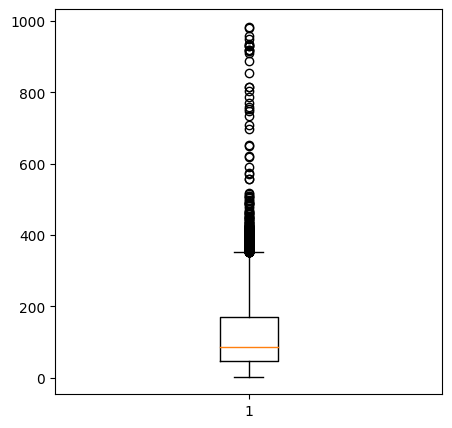

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot([len(t) for t in df_english.tweet_text_with_sw])
plt.show()

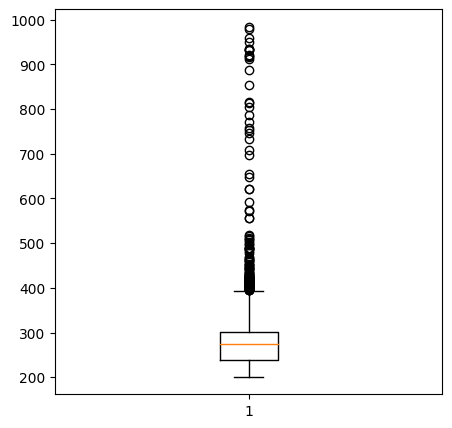

In [84]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot([len(t) for t in df_english[df_english['tweet_text_with_sw'].str.len() > 200].tweet_text_with_sw])
plt.show()

In [86]:
pattern_1 = r'@\w+'
pattern_2 = r'https?://\S+|www\.\S+' 
www_urls = r'www.[^ ]+'

combined_pattern = r'|'.join((pattern_1,pattern_2,www_urls))

def replace_apostrophe(text):
    # omit one-letter words
    one_letter_pat = r'\b\w\b'
    text = re.sub(one_letter_pat, '', text)
    # omit apostrophes
    text = text.replace("'", "")
    return text.strip()

pattern_3 = f"[^{re.escape(string.ascii_letters + string.digits + string.punctuation + ' ')}]"

i=0
def clean_text(text):
    global i
    # removing @mentions and urls     
    text = re.sub(combined_pattern,'',text)
    
    # decoding HTML encode      
    text = BeautifulSoup(text,'lxml').get_text()
    
    # decoding UTF-8 BOM
    text = re.sub(pattern_3, "", text)
    
    # handling negations
    text = replace_apostrophe(text)
    
    # keep only letters
    text = re.sub("[^a-zA-Z]", " ", text)
    
    # remove white spaces and lowercase all letters
    text = (' '.join(text.split())).lower()
    
    if(i%10000 == 0):
        print('completed:'+ str(i))
        
    i = i+1
    
    return text

In [88]:
df_english['tweet_text_with_sw'] = df_english['tweet_text_with_sw'].apply(clean_text)

/opt/homebrew/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


completed:100000
completed:110000
completed:120000
completed:130000
completed:140000
completed:150000
completed:160000
completed:170000
completed:180000


In [89]:
df_english['tweet_text_without_sw'] = df_english['tweet_text_without_sw'].apply(clean_text)

completed:190000
completed:200000
completed:210000
completed:220000
completed:230000
completed:240000
completed:250000
completed:260000
completed:270000
completed:280000


In [90]:
df_english

,date,tweet_text_with_sw,tweet_id,user_name,display_name,user_id,user_description,user_follower_count,user_friend_count,user_statuses_count,...,tweet_reply_count,tweet_retweet_count,tweet_like_count,tweet_quote_count,tweet_language,tweet_source,tweet_mentioned_users,year,month,tweet_text_without_sw
0,2022-04-22 17:26:15.207532763,sjshsjjsh who crying me oh my god sis namjoon ...,1.643000e+18,nadealeine,Noémie,1.278350e+18,NaN,16,113,43640,...,0,0,0,0,id,"<a href=""http://twitter.com/download/android"" ...",NaN,2022,4,sjshsjjsh who crying me oh god sis namjoon gon...
2,2021-03-23 10:27:38.540305625,someone needs to check the keepers betway account,1.643000e+18,ArsenalBLM,BLMAlways,1.293480e+18,#BlackLivesMatter,181,512,229,...,0,0,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,2021,3,someone needs check keepers betway account
3,2021-01-02 10:14:06.885676513,just want to ask cel haven gotten to know us y...,1.643000e+18,plngee,GheYaa,1.386010e+18,Duta Badlooking Sejagad!,46,114,1444,...,0,0,0,0,id,"<a href=""http://twitter.com/download/android"" ...","[User(username='jisellearn', id=16426332242403...",2021,1,just want ask cel gotten know us yet okay exci...
4,2022-12-21 10:46:27.602754696,that right aren you sleepy yet,1.643000e+18,REMASxHKE,Akiffa,7.736230e+17,you’ll find me on my tallest tiptoes spinning ...,139,117,3059,...,0,0,0,0,id,"<a href=""http://twitter.com/download/iphone"" r...","[User(username='REMASxKARINA', id=163376329292...",2022,12,that right sleepy yet
5,2022-05-24 08:51:10.357066577,consequences imagine that except at blm antifa...,1.643000e+18,Apodroplane,beyondbelief,1.430000e+18,Not too much but not too little,9,204,735,...,0,0,0,0,en,"<a href=""http://twitter.com/#!/download/ipad"" ...","[User(username='ProudElephantUS', id=810055220...",2022,5,consequences imagine that except blm antifa ri...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-04-12 20:51:23.180701486,miss being here when people have forgotten abo...,1.641870e+18,puzzlepieze,qila💗 REST LAGI🙏🏻,1.395240e+18,sbt account!🦋 — currently focus on #엔시티드림🧃— ha...,347,379,3473,...,0,0,0,0,id,"<a href=""http://twitter.com/download/android"" ...",NaN,2022,4,miss people forgotten yet
99996,2021-07-13 08:51:05.276020045,so you don like him pointing out the hypocriti...,1.641870e+18,VelkJay,John Velk,1.575650e+18,Smashing golf balls and fools. It/Nitwit,136,320,6198,...,0,0,1,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...","[User(username='WalshFreedom', id=236487888, d...",2021,7,so like pointing hypocritical idiocy show blm ...
99997,2021-06-11 08:48:19.736205407,yeah,1.641870e+18,Asagiri_Gennn,Gen Hive ∆ | BLM 🏳️‍🌈,1.152110e+18,Bi Traditional and Digital Artist. Pfp by @paw...,240,235,51776,...,0,0,1,0,en,"<a href=""http://twitter.com/download/iphone"" r...","[User(username='MayaCounty', id=13071846065385...",2021,6,yeah
99998,2022-01-24 11:45:16.207217695,there haven been lot of interactions but you l...,1.641870e+18,Erislov3,Eris on rant,1.426190e+18,19^. #Animanhwa Akun suka-suka. Not Spoiler Fr...,986,805,21424,...,1,0,0,0,id,"<a href=""http://twitter.com/download/android"" ...",NaN,2022,1,there lot interactions look like cute kid need...


In [96]:
column_names = list(df_english.columns)
print(column_names)

['date', 'tweet_text_with_sw', 'tweet_id', 'user_name', 'display_name', 'user_id', 'user_description', 'user_follower_count', 'user_friend_count', 'user_statuses_count', 'user_location', 'tweet_reply_count', 'tweet_retweet_count', 'tweet_like_count', 'tweet_quote_count', 'tweet_language', 'tweet_source', 'tweet_mentioned_users', 'year', 'month', 'tweet_text_without_sw']


In [100]:
df_english = df_english.filter(['date','year', 'month','tweet_text_with_sw','tweet_text_without_sw', 'tweet_id', 'user_name', 'display_name', 'user_id', 'user_description', 'user_follower_count', 'user_friend_count', 'user_statuses_count', 'tweet_reply_count', 'tweet_retweet_count', 'tweet_like_count', 'tweet_quote_count', 'tweet_language', 'tweet_mentioned_users']
)

df_english.head(5)

,date,year,month,tweet_text_with_sw,tweet_text_without_sw,tweet_id,user_name,display_name,user_id,user_description,user_follower_count,user_friend_count,user_statuses_count,tweet_reply_count,tweet_retweet_count,tweet_like_count,tweet_quote_count,tweet_language,tweet_mentioned_users
0,2022-04-22 17:26:15.207532763,2022,4,sjshsjjsh who crying me oh my god sis namjoon ...,sjshsjjsh who crying me oh god sis namjoon gon...,1.643000e+18,nadealeine,Noémie,1.278350e+18,NaN,16,113,43640,0,0,0,0,id,NaN
2,2021-03-23 10:27:38.540305625,2021,3,someone needs to check the keepers betway account,someone needs check keepers betway account,1.643000e+18,ArsenalBLM,BLMAlways,1.293480e+18,#BlackLivesMatter,181,512,229,0,0,0,0,en,NaN
3,2021-01-02 10:14:06.885676513,2021,1,just want to ask cel haven gotten to know us y...,just want ask cel gotten know us yet okay exci...,1.643000e+18,plngee,GheYaa,1.386010e+18,Duta Badlooking Sejagad!,46,114,1444,0,0,0,0,id,"[User(username='jisellearn', id=16426332242403..."
4,2022-12-21 10:46:27.602754696,2022,12,that right aren you sleepy yet,that right sleepy yet,1.643000e+18,REMASxHKE,Akiffa,7.736230e+17,you’ll find me on my tallest tiptoes spinning ...,139,117,3059,0,0,0,0,id,"[User(username='REMASxKARINA', id=163376329292..."
5,2022-05-24 08:51:10.357066577,2022,5,consequences imagine that except at blm antifa...,consequences imagine that except blm antifa ri...,1.643000e+18,Apodroplane,beyondbelief,1.430000e+18,Not too much but not too little,9,204,735,0,0,0,0,en,"[User(username='ProudElephantUS', id=810055220..."


In [101]:
df_english.to_csv('/Users/alenjose/Desktop/data/project_data/self-scraped/processed/BLM_english_tweets.csv') 